# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.

Se deben completar tres pasos. Para cada uno de ellos, se escribirá una breve introducción que reflejará con claridad cómo se resolverá cada paso, y se escribirán párrafos explicatorios que justificando las decisiones al tiempo que se avanza en la solución.  Finalmente irá una conclusión que resumirá todos los hallazgos y elecciones.

# Diccionario de datos

Hay cinco tablas en el conjunto de datos, y todas son necesarias para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

## Paso 1. Descripción de los datos

Se importarán las librerías `pandas` y `matplotlib`, junto con los datasets (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Se verificará la información para cada DataFrame creado.

In [1]:
import pandas as pd # importar librerías
from matplotlib import pyplot as plt

Ahora le damos un estilo uniforme a todos los gráficos del informe.

In [2]:
plt.style.use('ggplot')

Finalmente importamos los datasets agregando las debidas correcciones en caso de ser necesario.

In [3]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';') 
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';') # leer conjuntos de datos en los DataFrames

Ahora procedemos a previsualizar los datos, comenzando con `instacart_orders`.

In [4]:
instacart_orders.info() # mostrar información del DataFrame
instacart_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


En la columna `days_since_prior_order` podemos observar que hay valores ausentes y que el tipo de dato está erróneo, debería ser `int64`, esto será corregido más adelante. Seguimos con el dataset `products`.

In [5]:
products.info() # mostrar información del DataFrame
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


En la columna `product_name` podemos encontrar valores ausentes que deberán ser tratados. Pasamos al dataset `aisles`.

In [6]:
aisles.info() # mostrar información del DataFrame
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


En este dataset no se encuentran problemas. Pasamos a `departments`.

In [7]:
departments.info() # mostrar información del DataFrame
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


En este dataset tampoco se encuentran problemas. Pasamos al último conjunto de datos, `order_products`.

In [8]:
order_products.info(show_counts=True) # mostrar información del DataFrame
order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


En la columna `add_to_cart_order` podemos encontrar que existen valores ausentes y que el tipo de dato debería ser `int64`.

### Conclusiones

Se observa que son archivos separados por `;`, al corregir esto se puede apreciar que hay datos ausentes en tres de los cinco archivos y que hay que corregir el tipo de datos en dos dataframes.

## Paso 2. Preprocesamiento de los datos

Antes de pasar al análisis de los datos como tal, debemos trabajar los valores duplicados (tomando diferentes medidas si son cualitativos o cuantitativos) y los valores ausentes, siempre respetando el contexto, los demás datos de los dataframes y tratando de extraer información valiosa de estos.

Se preprocesarán los datasets siguiendo los siguientes lineamientos:

- Verificación y corrección de los tipos de datos.
- Identificación y trabajo de valores ausentes.
- Identificación y eliminación los valores duplicados.

### Encontrar y eliminar valores duplicados

Se realizará una búsqueda y trabajo (en caso de que corresponda) de los valores duplicados.

#### `orders` data frame

Calculamos el número de duplicados y mostramos los datos para verificar si tienen algo en común.

In [9]:
print(instacart_orders.duplicated().sum()) # Revisa si hay pedidos duplicados
print()
instacart_orders[instacart_orders.duplicated()]

15



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Hay 15 lineas duplicadas y __todas tienen como día `3` (miércoles) y hora `2`__. Ahora vamos a calcular el total de ventas registradas que coincidan con, dia 3 y hora 2.

In [10]:
len(instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]) #Se filtra el DataFrame por los pedidos realizados el miercoles a las 2

121

El resultado sugiere que de las 121 ventas registradas el miércoles a las 2, __15 son duplicados ingresados erróneamente__, por lo cual, el total de ventas del miércoles a las 2 es de 106. Viendo que se trata de un error, eliminaremos los duplicados.

In [11]:
instacart_orders.drop_duplicates(inplace=True) # Eliminar los pedidos duplicados
print(instacart_orders.duplicated().sum()) # Verificar nuevamente si hay filas duplicadas

0


Los duplicados son eliminados exitosamente. Ahora se revisará únicamente la columna `order_id` en busca de ID's repetidas.

In [12]:
instacart_orders[instacart_orders.duplicated('order_id')] # Verificar si hay IDs duplicados de pedidos
print(instacart_orders['order_id'].duplicated().sum())

0


No se encuentran duplicados en la columna.

Resumiendo, se comprueba la existencia de duplicados completamente idénticos en el dataset, los cuales tenían el día y la hora en común, por lo cual se revisan todos los pedidos hechos en ese día y hora (miércoles a las 2) para encontrar alguna otra anomalía, sin embargo, todo se ve bien. Finalmente __se eliminan los duplicados completos__ y se comprueba la existencia de duplicados exclusivamente en la columna `order_id` (lo cual no es problemático, ya que es una columna de codigos únicos para cada pedido y pueden haber varios artículos en un pedido) no se encuentran duplicados adicionales en esta columna.

#### `products` data frame

Comenzamos calculando el número de filas completamente duplicadas.

In [13]:
print(products.duplicated().sum()) # Verificar si hay filas totalmente duplicadas

0


Ahora calcularemos el número de nombres de producto duplicados en el dataset. Para realizar el cálculo convertiremos todo el texto de la columna a mínusculas para evitar dejar fuera duplicados implícitos.

In [15]:
products['product_name'] = products['product_name'].str.lower() # Revisar únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print()
print(products['product_name'].duplicated().sum())


1361


Son encontrados 1361 nombres de producto repetidos. Buscaremos duplicados en los ID de producto para ver si concuerdan con los de la columna `product_name`.

In [16]:
print(products['product_name'].dropna().duplicated().sum()) # Revisar si hay nombres duplicados de productos no faltantes
print()
print(products['product_id'].duplicated().sum())

104

0


Se encuentra que existen varias filas con nombres de producto duplicados, sin embargo la gran mayoría corresponden a productos con nombre ausente, siendo solo 104 valores nombres duplicados con valores no ausentes, al revisar duplicados por id de producto, nos encontramos con que __no existen duplicados, por lo que debe tratarse del mismo producto pero diferente marca__ (o algo por el estilo).

#### `departments` data frame

De la misma manera que en los datasets anteriores calcularemos el número de filas completamente duplicadas.

In [17]:
print(departments.duplicated().sum()) # Revisar si hay filas totalmente duplicadas

0


No se encuentran duplicados, se revisará si hay IDs de departamento duplicados.

In [18]:
print(departments['department_id'].duplicated().sum()) # Revisar únicamente si hay IDs duplicadas de departamento

0


No se encuentran duplicados completos ni por id de departamento.

#### `aisles` data frame

Iniciamos la búsqueda de duplicados completos.

In [19]:
print(aisles.duplicated().sum()) # Revisar si hay filas totalmente duplicadas

0


Buscamos ahora en los ID de pasillo.

In [20]:
print(aisles['aisle_id'].duplicated().sum()) # Revisar únicamente si hay IDs duplicadas de pasillos

0


No se encuentran duplicados completos ni por id de pasillo.

#### `order_products` data frame

Verificamos la existencia de duplciados completos en el conjunto de datos.

In [21]:
print(order_products.duplicated().sum()) # Revisa si hay filas totalmente duplicadas

0


No hay duplicados completos.

### Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

#### `products` data frame

Comenzamos guardando filas con valores ausentes en la variable `isna`.

In [23]:
isna = products[products['product_name'].isna()] # Encuentra los valores ausentes en la columna 'product_name'
print(products['product_name'].isna().sum())
isna.head()

1258


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21


Hay 1258 valores ausentes en la columna `product_name`, podemos apreciar que parecen encontrarse solo en el pasillo 100 y departamento 21, para confirmar esto buscaremos el número de valores ausentes en el pasillo 100.

In [24]:
products_in = products[products['product_name'].isna()] #  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(len(products_in.query('aisle_id == 100')))

1258


Los números coinciden, es decir, todos los valores ausentes están relacionados con el pasillo con ID 100. Ahora revisaremos haremos lo mismos con el pasillo 21.

In [25]:
print(len(products_in.query('department_id == 21'))) # ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

1258


Los números vuelven a coincidir, todos los valores ausentes están relacionados con el pasillo con ID 21.

In [26]:
print(departments.query('department_id == 21')) # Usar las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print()
print(aisles.query('aisle_id == 100'))

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


Tanto el departamento de ID 21 como el pasillo de ID 100 se encuentran `missing` (faltantes). Procederemos a reemplazar los ausentes con `Unknown`.

In [27]:
products['product_name'].fillna('Unknown', inplace=True) # Completa los nombres de productos ausentes con 'Unknown'
print()
print(products['product_name'].isna().sum())


0


Se reemplaza el `Nan` con `Unknown` ya que son productos desconocidos, sin emabrgo los datos relacionados podrían seguir sirviendo para un análisis.

#### `orders` data frame

Aislamos las filas con valores ausentes y visualizamos una muestra para observar características en común.

In [28]:
orders_isna = instacart_orders[instacart_orders['days_since_prior_order'].isna()] # Encuentra los valores ausentes
orders_isna.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN


Podemos observar que los valores ausentes en la columna `days_since_prior_order` están relacionados al primer pedido de cada cliente, esto tiene mucho sentido, sin embardo, vamos a asegurarnos de que los números coincidan entre la cantidad de ausentes y la cantidad de primeros pedidos.

In [29]:
print(len(orders_isna))
print(len(instacart_orders.query('order_number == 1'))) # ¿Hay algún valor ausente que no sea el primer pedido del cliente?

28817
28817


Se encuentran 28.817 valores ausentes en la columna `days_since_prior_order`, que corresponden (todos) al primer pedido del cliente, por lo cual, tiene sentido que sean valores ausentes, ya que no hay un pedido anterior al primer pedido.

#### `order_products` data frame

Para empezar, buscaremos el número exacto de ausentes en la columna donde faltan datos.

In [30]:
print(order_products['add_to_cart_order'].isna().sum()) # Encuentra los valores ausentes

836


Ahora, buscaremos valores mínimos y máximos para determinar si podemos encontrar alguna causa sobre la ausencia de datos.

In [31]:
print(order_products['add_to_cart_order'].max()) # ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min())

64.0
1.0


Se decubren 836 valores ausentes en la columna y se determina que los valores máximos y mínimos para esta son 64 y 1 respectivamente. 

Ahora determinaremos la cantidad de productos por pedido para los pedidos que tengan valores ausentes en la columna estudiada, comenzamos guardando las ID de pedido que tengan valores ausentes en `add_to_cart_order` en una lista.

In [48]:
order_products_addisna = order_products[order_products['add_to_cart_order'].isna()] # Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_nan = order_products_addisna['order_id']

Ahora filtramos el dataset original en base a la lista, agrupamos por cantidad de artículos por pedido y mostraremos el valor mínimo de la lista.

In [33]:
id_in_op = order_products.query('order_id in @id_nan') # ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
print(id_in_op['order_id'].value_counts().min()) # Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

65


Se descubre y se verifica que __el máximo orden secuencial que se registró es hasta 64__, por ende, todos los pedidos que tienen más de 64 productos tienen valores ausentes en la columna `add_to_cart_order`, es probable que esto sea porque el sistema de registro del orden de los productos en cada pedido, tenga capacidad y/o está configurado para contar el orden de hasta 64 productos por pedido.

Se rellenarán los ausentes con 999 simbolizado que estos valores exceden el máximo registro, también se asignará el tipo correcto de datos a la columna.

In [34]:
order_products['add_to_cart_order'].fillna(999, inplace=True) # Remplazar los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
print(order_products['add_to_cart_order'].isna().sum())

0


Se rellenan los valores ausentes en la columna `add_to_cart_order` con 999 para dar a entender que corresponden a valores que están por sobre el máximo registrado, también se corrige el tipo de dato pasandolo de `float` a `int` que es el que le corresponde por tratarse de números enteros.

#### Conclusiones

Después de haber trabajado los valores ausentes, dupicados y los tipos de datos, se puede proceder sin problemas al análisis.

## Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, se realizarán los siguientes análisis:

### Análisis básico

Consta de los siguientes puntos.

1. Verificar que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crear un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crear un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crear un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comentar sobre los valores mínimos y máximos.

#### Verificar que los valores sean sensibles

Comenzamos estudiando información sobre la distribución de algunas columnas, para asegurarnos que los valores sean acertados y trabajables, comenzamos con `order_hour_of_day`.

In [35]:
print(instacart_orders['order_hour_of_day'].describe())

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64


Efectivamente los valores van desde 0 a 23, lo cual está dentro de lo esperado. Pasamos ahora a `order_dow`.

In [36]:
print(instacart_orders['order_dow'].describe())

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64


Los datos van de 0 a 6, lo cual es lo esperado para los días de la semana. Los datos de las columnas `order_hour_of_day` y `order_dow` son razonables ya que entran dentro de los márgenes esperados para este tipo de datos.

#### Para cada hora del día, ¿cuántas personas hacen órdenes?

Procedemos a construir un gráfico de barras que mostrará la cantidad de pedidos realizados por cada hora.

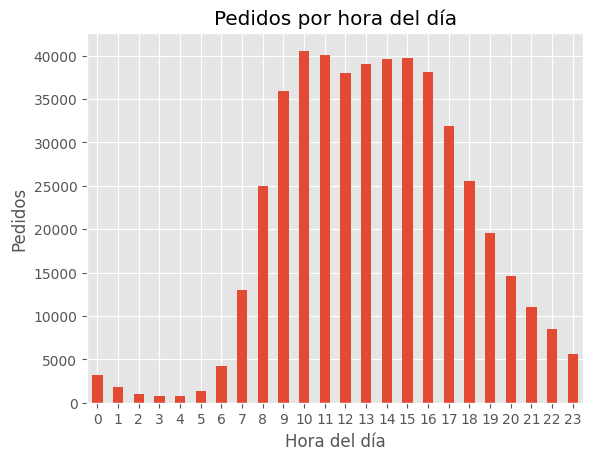

In [37]:
io_plot = instacart_orders['order_hour_of_day'].value_counts(sort=False)
io_plot.plot(kind='bar', ylabel='Pedidos', xlabel='Hora del día', title='Pedidos por hora del día', rot=0);

Se puede apreciar __que entre las 9 y las 16 está el grueso de los pedidos__, llegando hasta los 40.000, mientras que el punto mas bajo en ventas es entre las 0 y las 6, donde no superan los 5.000.

#### ¿Qué día de la semana compran víveres las personas?

Construiremos en gráfico de pedidos por día de la semana para responder esta pregunta.

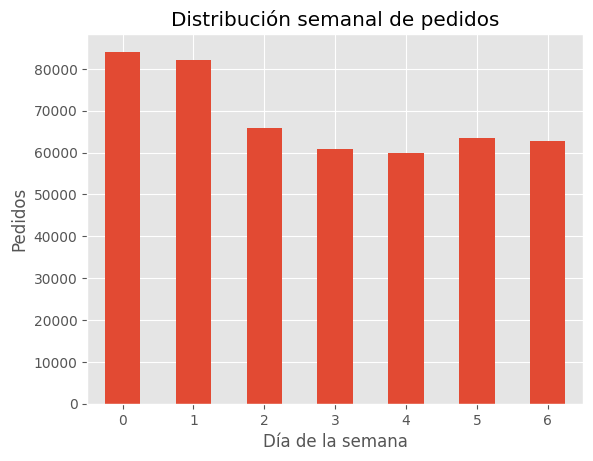

In [38]:
od_plot = instacart_orders['order_dow'].value_counts(sort=False)
od_plot.plot(kind='bar', ylabel='Pedidos', xlabel='Día de la semana', title='Distribución semanal de pedidos', rot=0);

Se puede apreciar que __los días con mas pedidos son los domingos y los lunes__, rondando los 80.000, mientras que el resto de la semana los pedidos se mantienen estables alrededor de los 60.000 por día (en total).

#### ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? 

Para respodner esta pregunta, se construirá un histograma basado en la columna `days_since_prior_order`.

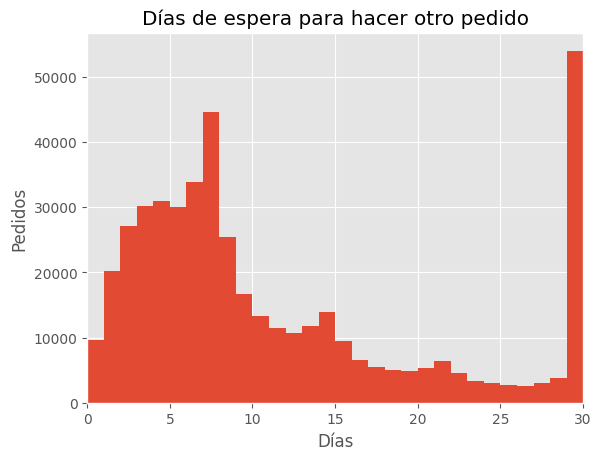

In [39]:
instacart_orders['days_since_prior_order'].plot(kind='hist', grid='on', bins=30, xlim=[0, 30], title='Días de espera para hacer otro pedido')
plt.xlabel('Días')
plt.ylabel('Pedidos');

__Los clientes demoran entre 0 y 30 días en realizar un nuevo pedido__, con un tiempo promedio de 11.1 días y una mediana de 7 días, los "días entre compra" mas prósperos (entre 40.000 y 50.000 pedidos) son: 7 y 30 días, es decir, una semana, y un mes desde la última compra, respectivamente.

### Análisis Intermedio

Tratará sobre resolver las siguientes preguntas y tareas.

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? 
2. Graficar la distribución para el número de órdenes que hacen los clientes 
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia?

#### Diferencia entre miércoles y sábados para  `'order_hour_of_day'`

Para responder esta pregunta, construiremos un gráfico de barras de las ventas realizadas los sábados y los miércoles, por hora.

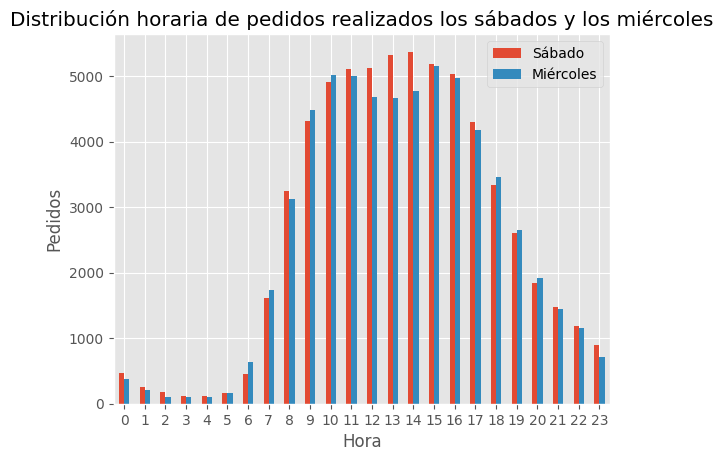

In [40]:
wed_io = instacart_orders[instacart_orders['order_dow'] == 3]
wed_plot = wed_io['order_hour_of_day'].value_counts(sort=False)
sat_io = instacart_orders[instacart_orders['order_dow'] == 6]
sat_plot = sat_io['order_hour_of_day'].value_counts(sort=False)
concat = pd.concat([sat_plot,wed_plot],axis='columns')
concat.plot(kind='bar', ylabel='Pedidos', xlabel='Hora', title='Distribución horaria de pedidos realizados los sábados y los miércoles', grid='on', rot=0)
plt.legend(['Sábado','Miércoles']);

__Son distribuciones similares__, la principal diferencia se puede observar entre las 12 y las 14 horas, ya que en los miércoles, en este rango horario tienden a bajar los pedidos (en comparación a las dos horas anteriores) en cambio, en los sábados, este rango horario es el mas productivo llegando al peak del día.

#### ¿Cuál es la distribución para el número de pedidos por cliente?

Para resolver esta pregunta visualizaremos mediante un histograma la distribución solicitada.

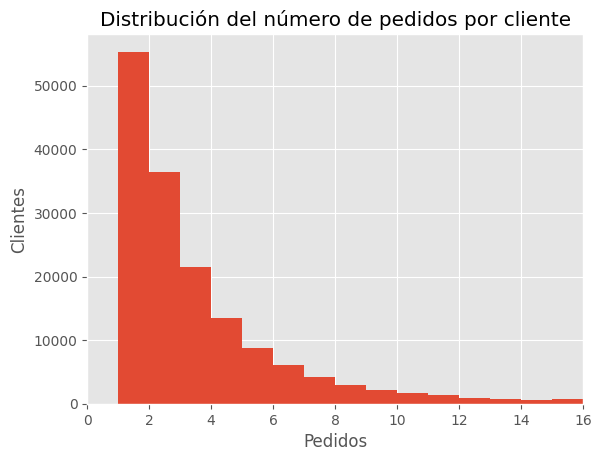

In [41]:
on_io = instacart_orders.groupby('user_id')['order_id'].count()
on_io.plot(kind='hist', xlim=[0,16], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], grid='on', title='Distribución del número de pedidos por cliente')
plt.xlabel('Pedidos')
plt.ylabel('Clientes');

Se puede apreciar que __el grueso de clientes estudiados ha hecho entre 1 a 4 pedidos en la compañia__, a partir de los 4 pedidos en adelante hay una relación inversamente proporcional entre el numero de pedidos por cliente, y la cantidad de clientes que hacen estos pedidos.

#### ¿Cuáles son los 20 productos más populares?

Visualizaremos en un gráfico de barras los 20 productos con más ventas y sus respectivos ID.

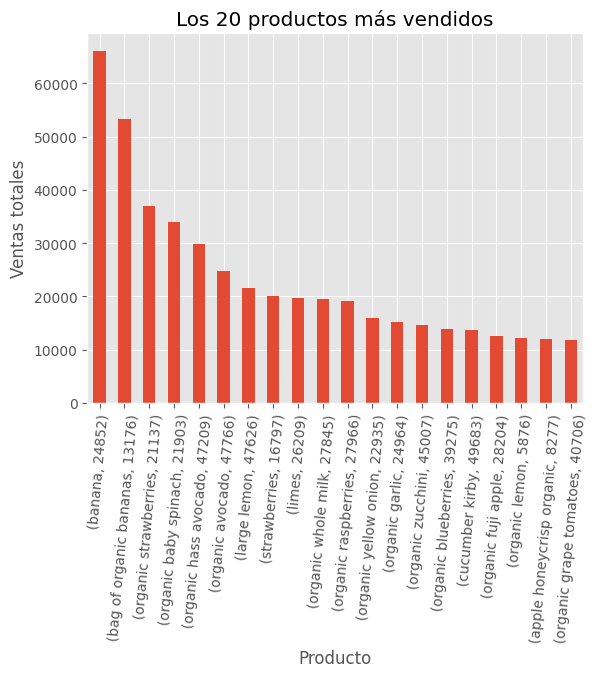

In [42]:
popular = products.merge(order_products,on='product_id')
popular = popular.groupby(['product_name','product_id'])['product_id'].count()
popular = popular.sort_values(ascending=False)
popular = popular.head(20)
popular.plot(kind='bar', xlabel='Producto', ylabel='Ventas totales', title='Los 20 productos más vendidos', rot=85);

En el DataFrame impreso se puede apreciar la lista de los 20 productos más vendidos, siendo __la banana, el racimo de bananas y las frutillas orgánicas el primer, segundo y tercer lugar de la lista respectivamente__. Podemos observar también que son en su totalidad __productos naturales y orgánicos__.

### Análisis avanzado

Consistirá en responder las siguientes preguntas.

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido?
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos?

#### ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Visualizaremos la distribución de artículos por pedido en un histograma.

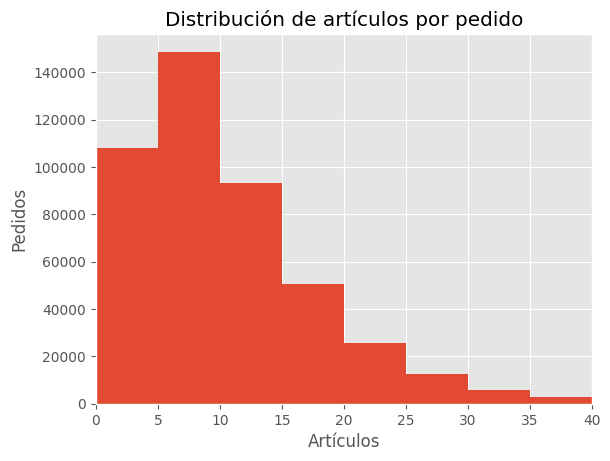

In [50]:
apo = order_products.groupby('order_id')['product_id'].count()
apo.plot(kind='hist', grid='on', xlim=[0,40], title='Distribución de artículos por pedido', bins=[0,5,10,15,20,25,30,35,40])
plt.xlabel('Artículos')
plt.ylabel('Pedidos');

Se puede apreciar que __el grueso de artículos por pedido son entre 5 y 10 unidades__, y que se produce una caída drástica en la cantidad de pedidos con 10 a 15 artículos, y la cantidad de pedidos con 15 a 20 artículos.

#### ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?

Usando la columna `reordered` construiremos un gráfico de barras con los 20 productos que vuelven a pedirse con mayor frecuencia.

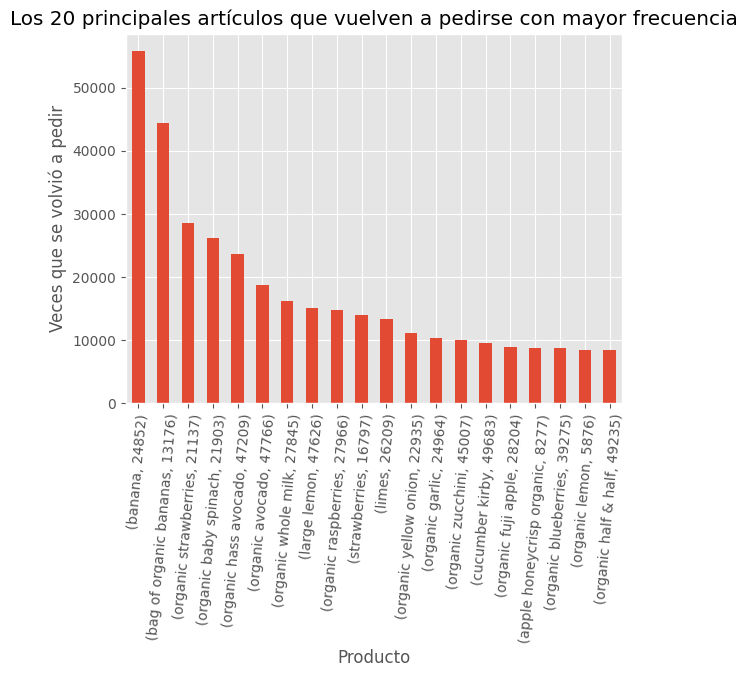

In [44]:
reor = order_products[(order_products['reordered'] == 1)]
popular_reor = products.merge(reor,on='product_id')
popular_reor = popular_reor.groupby(['product_name','product_id'])['product_id'].count()
popular_reor = popular_reor.sort_values(ascending=False)
popular_reor = popular_reor.head(20)
popular_reor.plot(title='Los 20 principales artículos que vuelven a pedirse con mayor frecuencia', kind='bar', xlabel='Producto', ylabel='Veces que se volvió a pedir', rot=85);

En el DataFrame impreso se puede apreciar la lista de los 20 productos que vuelven a pedirse con mayor frecuencia en este negocio, se puede apreciar que es muy parecida a la tabla de los 20 productos más vendidos, lo cual es indicio de que __el negocio cuenta con una clientela fiel__.

#### Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

Para resolver esta pregunta, construiremos un dataset agrupado por productos donde se mostrará el promedio de `reordered` que oscilará en valores entre 0 y 1, dependiendo de cuántas veces se "re-ordene" el producto en cuestión.

In [45]:
propor = order_products.merge(products,on='product_id')
propor = propor.groupby(['product_name','product_id'])['reordered'].mean().reset_index()
propor.head()

,product_name,product_id,reordered
0,#2 coffee filters,25773,0.254545
1,#2 cone white coffee filters,2158,0.000000
2,#2 mechanical pencils,26685,0.000000
3,#4 natural brown coffee filters,26381,0.358974
4,& go! hazelnut spread + pretzel sticks,20604,0.466667


El dataset solicitado se guardó en la variable `propor`. 

#### Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

De un modo muy parecido al del punto anterior, se calculará la tasa de "re-ordenación" para cada cliente. La única diferencia es que ahora se agrupará el dataset por cliente en vez de por producto.

In [46]:
client_prop = order_products.merge(instacart_orders,on='order_id')
client_prop = client_prop.groupby(by='user_id')['reordered'].mean().reset_index()
client_prop.head()

,user_id,reordered
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571


La información solicitada se guardó en `client_prop`.

#### ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

Filtrando los valores de la columna `add_to_cart_order` en `1` obtenemos todas las veces que un producto fue agregado primero al carrito, usando esta información construiremos un gráfico de barras con los nombres e ID's de los productos.

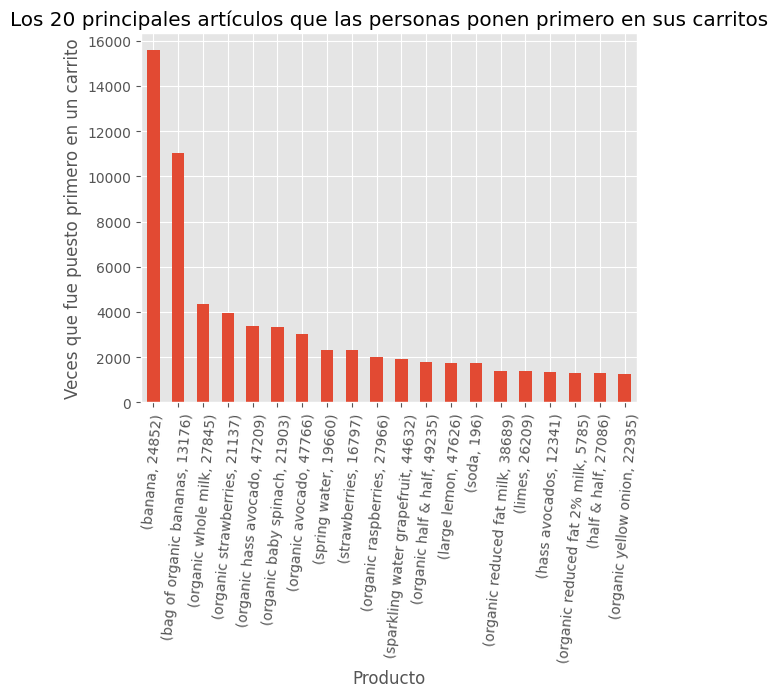

In [49]:
first_order = order_products.merge(products,on='product_id')
first_order = first_order[first_order['add_to_cart_order'] == 1]
first_order = first_order.groupby(['product_name','product_id'])['product_name'].count()
first_order = first_order.sort_values(ascending=False)
first_order = first_order.head(20)
first_order.plot(title='Los 20 principales artículos que las personas ponen primero en sus carritos', kind='bar', xlabel='Producto', ylabel='Veces que fue puesto primero en un carrito', rot=85);

En el DataFrame impreso se puede apreciar la lista de los 20 que las personas ponen primero en sus carritos, se puede apreciar que el primer y segundo lugar son nuevamente las bananas y el racimo de bananas respectivamente, lo cual nos puede hacer concluir (tomando en cuenta los análisis anteriores) que __las bananas de este negocio son un producto muy requerido por su clientela__, y, que en general __los alimentos naturales y orgánicos__ (frutas, verduras, leche) son los más vendidos, los que más vuelven a ser comprados por los clientes y los primeros en ser agregados al carrito.

## Conclusion general del proyecto:

__1 Importación de los datos:__

En esta fase, y después de haber leído el diccionario de datos, se importan las librerías (pandas y matplotlib, analizar la información y crear gráficas respectivamente) y posteriormente se importan los datos, haciendo correcciones para asegurar que los datasets puedan verse perfectamente y dando una primera vista a estos, se puede observar el tipo de datos que python asignó automáticamente y la cantidad de datos ausentes en cada columna.

__2 Pre-procesamiento de los datos:__

Con la información recopilada en la fase anterior, se puede pasar a hacer la limpieza de los datos, eliminando o corrigiendo duplicados corresponda, tratando los valores ausentes y corrigiendo los tipos de datos que se asignaron erróneamente, para que estos queden listos para ser analizados.

__3 Análisis de los datos:__

En la fase final se comienza a responder las preguntas solicitadas, usando diferentes gráficos segun corresponda, se responden preguntas de importancia para el negocio en cuestión, como tasa de reorden, productos más pedidos, y comportamiento de los clientes, (entre otros). Algunas de las solicitudes requisieron combinar mas de un dataframe, para así aumentar drásticamente la cantidad de información valiosa que se puede extraer, cada gráfico o bloque de código en esta fase va acompañado de una breve explicación del proceso y los resultados obtenidos.

En cuanto a conclusiones generales, se puede rescatar que: 
- La fuerte preferencia de la clientela por los __productos naturales y saludables y particularmente por las bananas__.
- El que los productos mas vendidos, los más reordenados y los primeros en agregarse a los carritos sean parecidos, indica que __una parte importante de las compras vienen de clientes que conocen el negocio__, probablemente son clientes frecuentes y son gente que come sanamente.
- Existe otro grupo que también debe considerarse como importante, que son las compras que vienen de clientes que compran cosas  por una sola vez, como se puede apreciar en B2 son una enorme cantidad. __Hay una enorme cantidad de clientes que ha comprado solo una vez en el sitio__, esto, sin embargo no contradice al punto anterior, puede deberse a que son clientes que hacen llevan pocos artículos, a que __compran los mismos artículos que los clientes regulares__ (lo más probable) o a cualquier otro motivo que se puede seguir investigando.
- __Los domingos y los lunes son los días de mayor venta, y entre las 09:00 y las 16:00 se registra la mayor cantidad de pedidos__.
- __La clientela suele comprar entre 5 y 10 artículos por pedido__.